# Introduction to Computer Vision: Twitter US Airline Sentiment

### <b> By Lakshmi Devesh Kumar</b>

## Problem Statement

### Context

Twitter's massive user base of 330 million monthly active users presents a direct avenue for businesses to connect with a broad audience. However, the vast amount of information on the platform makes it challenging for brands to swiftly detect negative social mentions that may impact their reputation. To tackle this, sentiment analysis has become a crucial tool in social media marketing, enabling businesses to monitor emotions in conversations, understand customer sentiments, and gain insights to stay ahead in their industry.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

### Objective

The aim of this project is to build a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing necessary libraries

In [1]:
# Install the contractions package
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.9 MB/s eta 0:00:00


In [2]:
# Install vader sentiment package
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [3]:
# Install textblob package
!pip install textblob

In [4]:
# Install and import necessary libraries.

#Import re for regular expressions
import re

# Helps to remove punctuations
import string

# import unicodedata to remove the accented characters
import unicodedata
import contractions
from bs4 import BeautifulSoup


import pandas as pd
import numpy as np
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

# Import count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
 # Import train test split
from sklearn.model_selection import train_test_split
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Import cross val score
from sklearn.model_selection import cross_val_score
# Import confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from wordcloud import WordCloud
 # Import Tf-Idf vector
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow
from tensorflow.keras import backend
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Loading the dataset

In [5]:
# Mount Google drive to access the dataset only if you are using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read the data
tweets = pd.read_csv("/content/drive/MyDrive/Python Course/Project 9/Tweets.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

In [7]:
# Creating the copy of the data frame
data = tweets.copy()

In [8]:
# View the first 5 rows of the dataset
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
# View the last 5 rows of the dataset
data.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


## Find the shape of the dataset

In [10]:
data.shape

(14640, 15)

### Concise summary of the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### Checking for Missing Values

In [12]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Check for duplicate values

In [13]:
data.duplicated().sum()

36

* There are 36 duplicate rows. We can keep pnly the first value and remove the other duplicate values as shown below.

In [14]:
# dropping the duplicates
data = data.drop_duplicates(keep = 'first')

# checking for duplicate values
data.duplicated().sum()

0

In [15]:
# resetting the index of the dataframe
data = data.reset_index(drop = True)

* The duplicate values have been removed.

#### Unique values

In [16]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Percentage of tweets for each airline

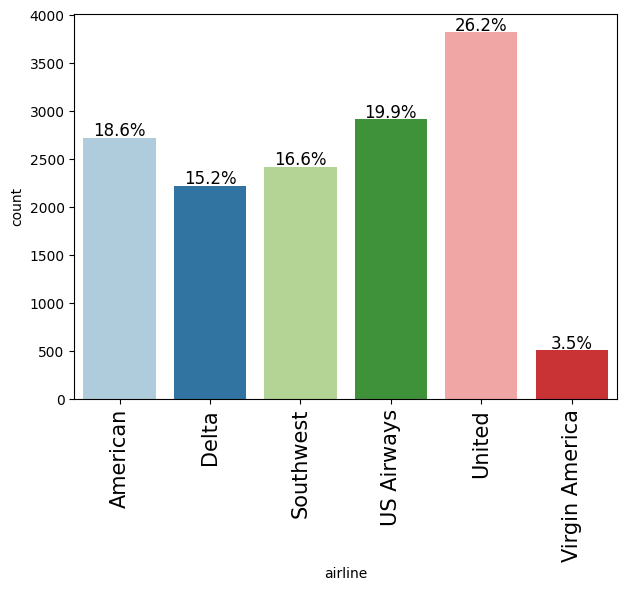

In [18]:
# Plot the labeled barplot for airline
labeled_barplot(data, "airline", perc=True)

#### Distribution of sentiments across all the tweets

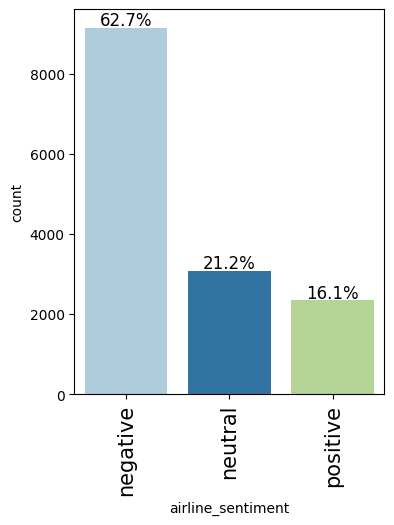

In [19]:
# Plot the labeled barplot for airline_sentiment
labeled_barplot(data, "airline_sentiment", perc=True)

#### Plot of all the negative reasons

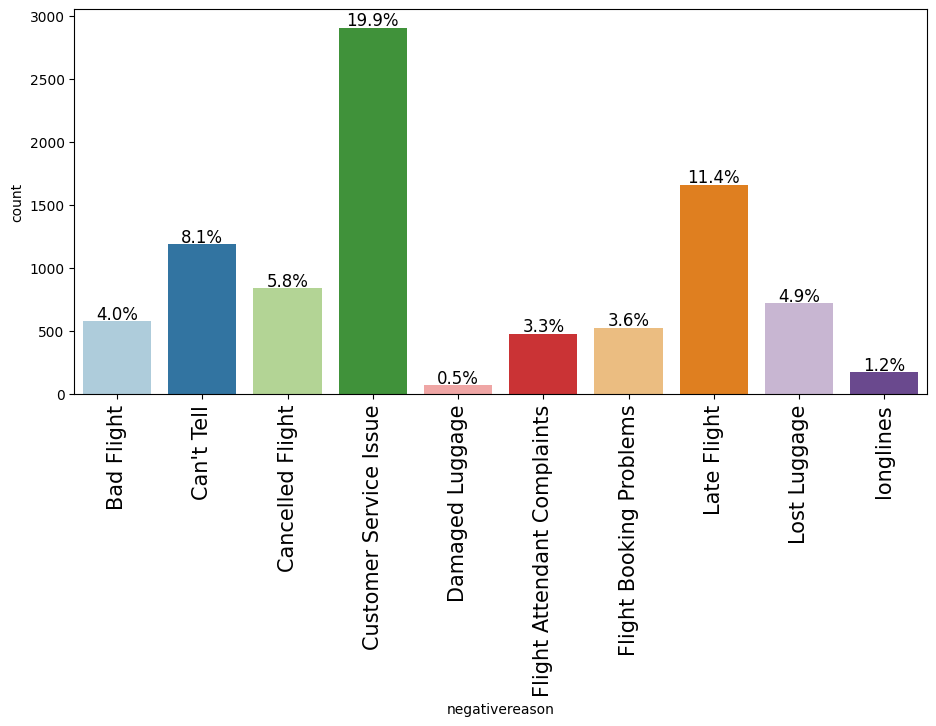

In [20]:
# Plot the labeled barplot for negative reason
labeled_barplot(data, "negativereason", perc=True)

#### Distribution of airline_sentiment_gold across all tweets

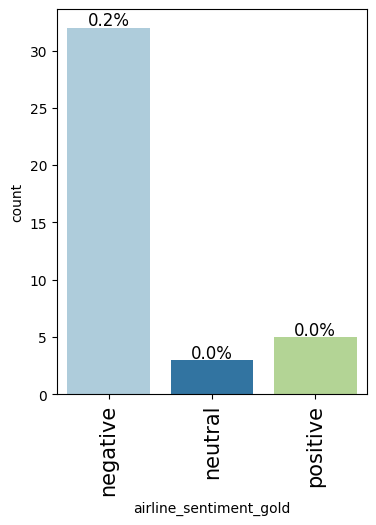

In [21]:
labeled_barplot(data, "airline_sentiment_gold", perc=True)

#### Distribution of negativereason_gold across all tweets

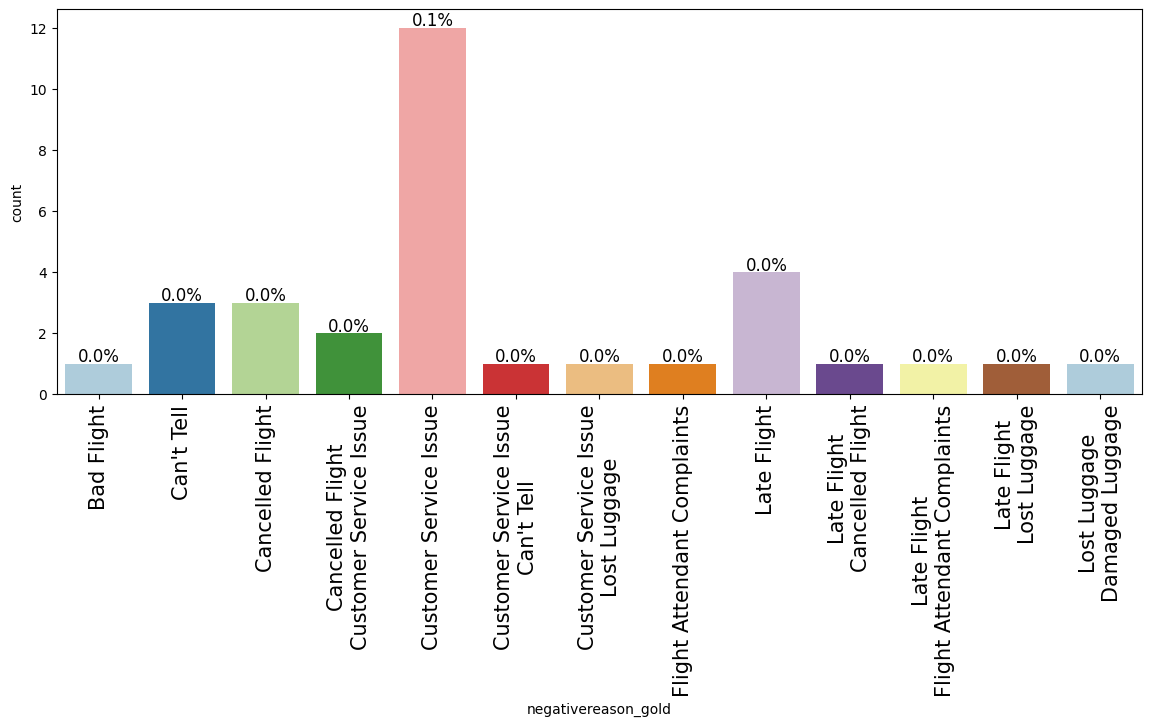

In [22]:
labeled_barplot(data, "negativereason_gold", perc=True)

#### Distribution of retweet_count across all tweets

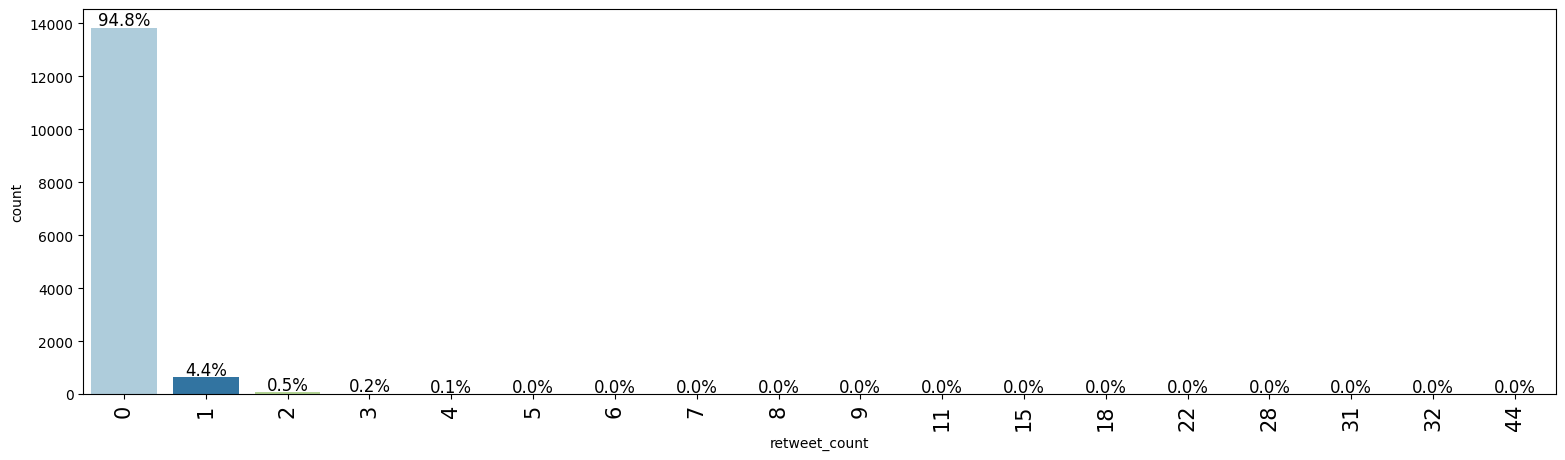

In [23]:
labeled_barplot(data, "retweet_count", perc=True)

### Bivariate Analysis

#### Distribution of Sentiment of tweets for each airline

airline_sentiment,negative,neutral,positive
airline,,,
American,1941,455,327
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


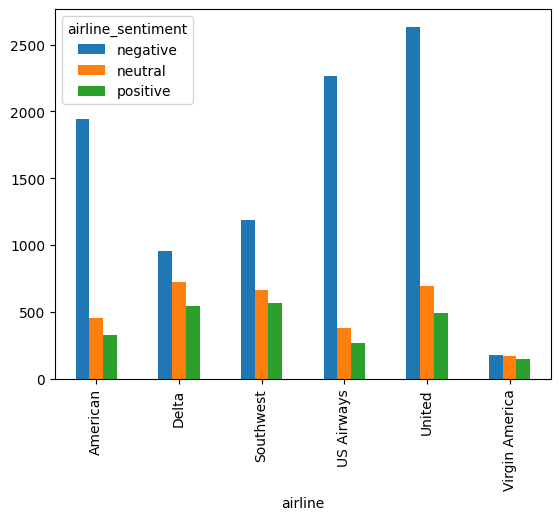

In [24]:
# Code to plot the barplot for the distribution of each airline with total sentiments
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
airline_sentiment


#### Wordcloud for negative tweets

In [25]:
airline_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [26]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

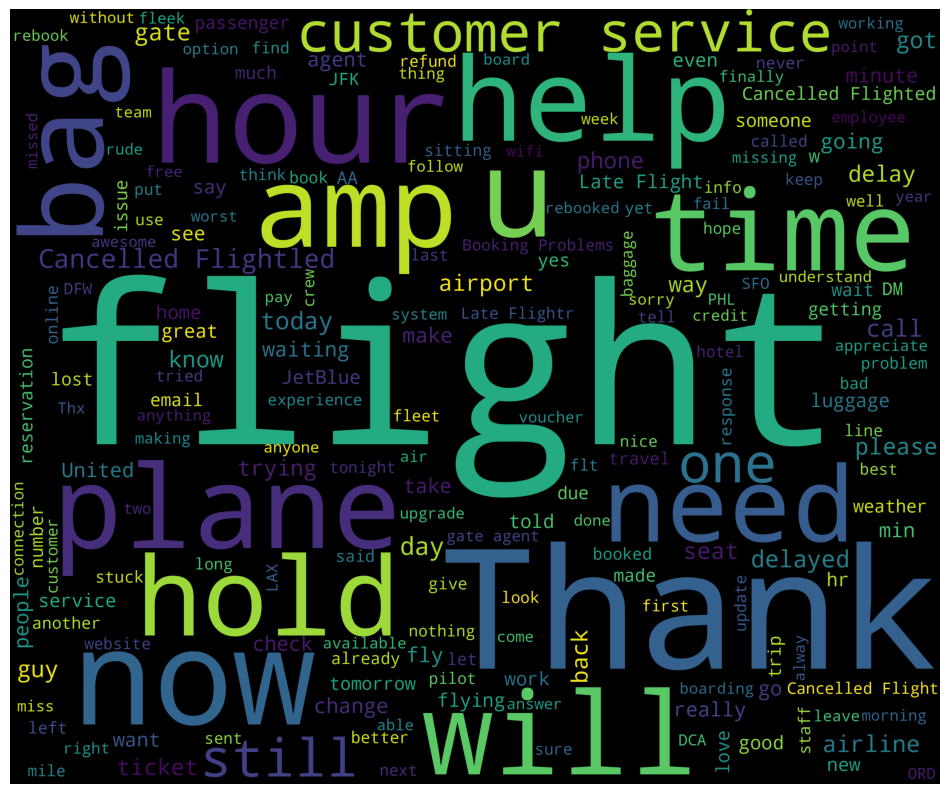

In [27]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Wordcloud for positive tweets

In [28]:
airline_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [29]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

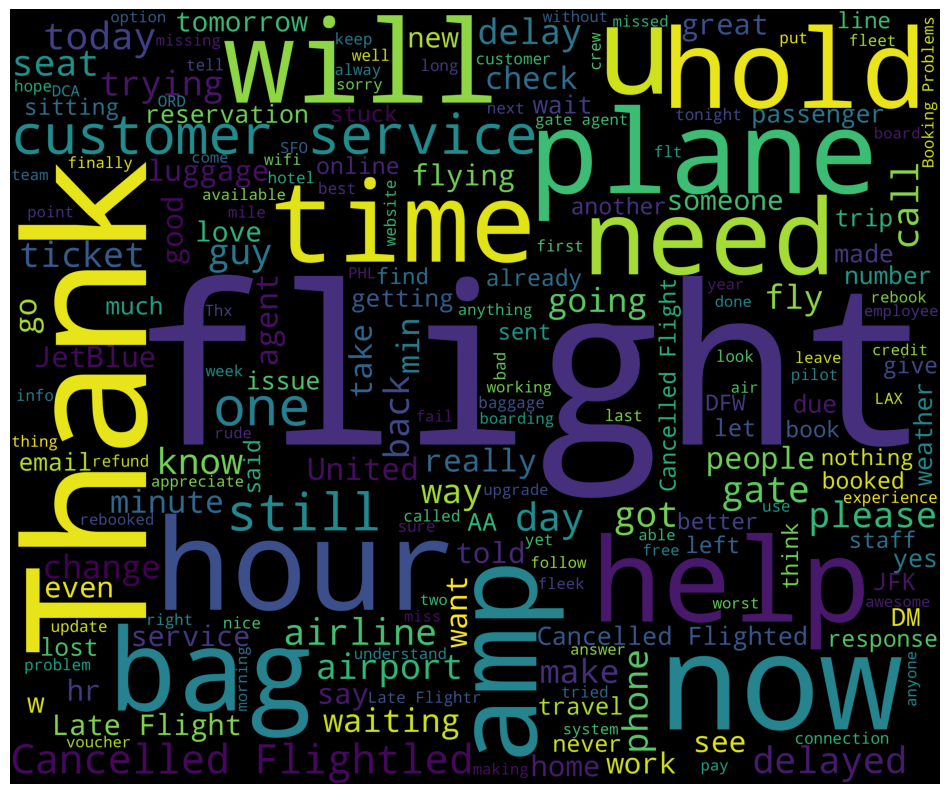

In [30]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Questions**:

#### 1. What is the percentage of tweets for each airline?

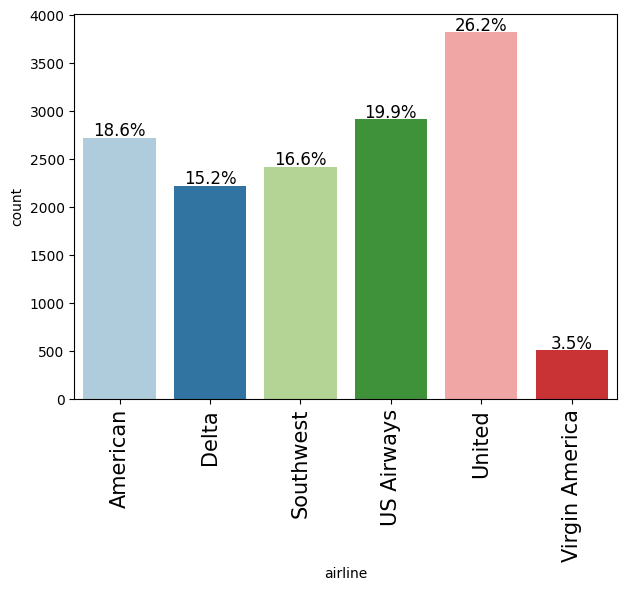

In [31]:
# Plot the labeled barplot for airline
labeled_barplot(data, "airline", perc=True)

#### Observations:
* We can observe from the above plot that  given airlines in the dataset:
* American - 18.6% tweets
* Delta - 15.2% tweets
* Southwest - 16.6% tweets
* US Airways - 19.9% tweets
* United - 26.2% tweets
* Virgin America - 3.5% tweets

* The max number of tweets are for United and the least number of tweets are for Virgin America.

#### 2. What is the distribution of sentiments across all the tweets?

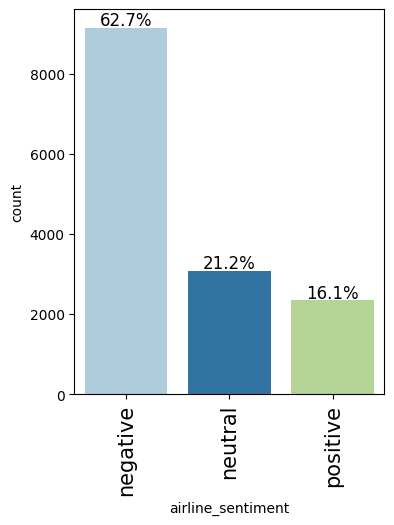

In [32]:
# Plot the labeled barplot for airline_sentiment
labeled_barplot(data, "airline_sentiment", perc=True)

#### 3. What is the distribution of sentiments for each airline?

airline_sentiment,negative,neutral,positive
airline,,,
American,1941,455,327
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


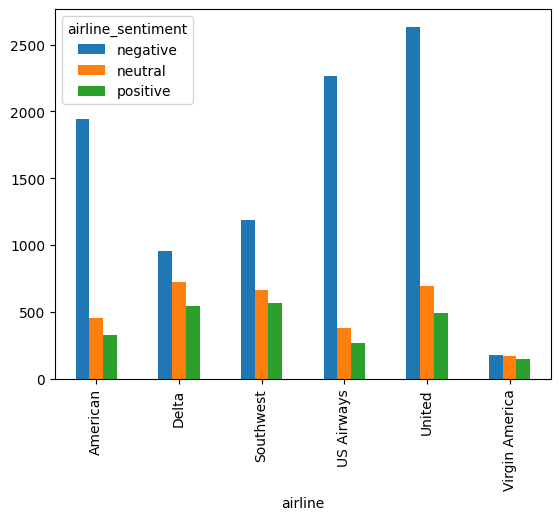

In [33]:
# Code to plot the barplot for the distribution of each airline with total sentiments
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
airline_sentiment


#### Observations:
* The above plot shows the distribution of sentiments for each airline.
* Among all the airlines, Delta has the highest neutral tweets.
* United has the most negative tweets.
* Southwest has the most positive tweets.


#### 4. What does the plot of negative reasons indicate?

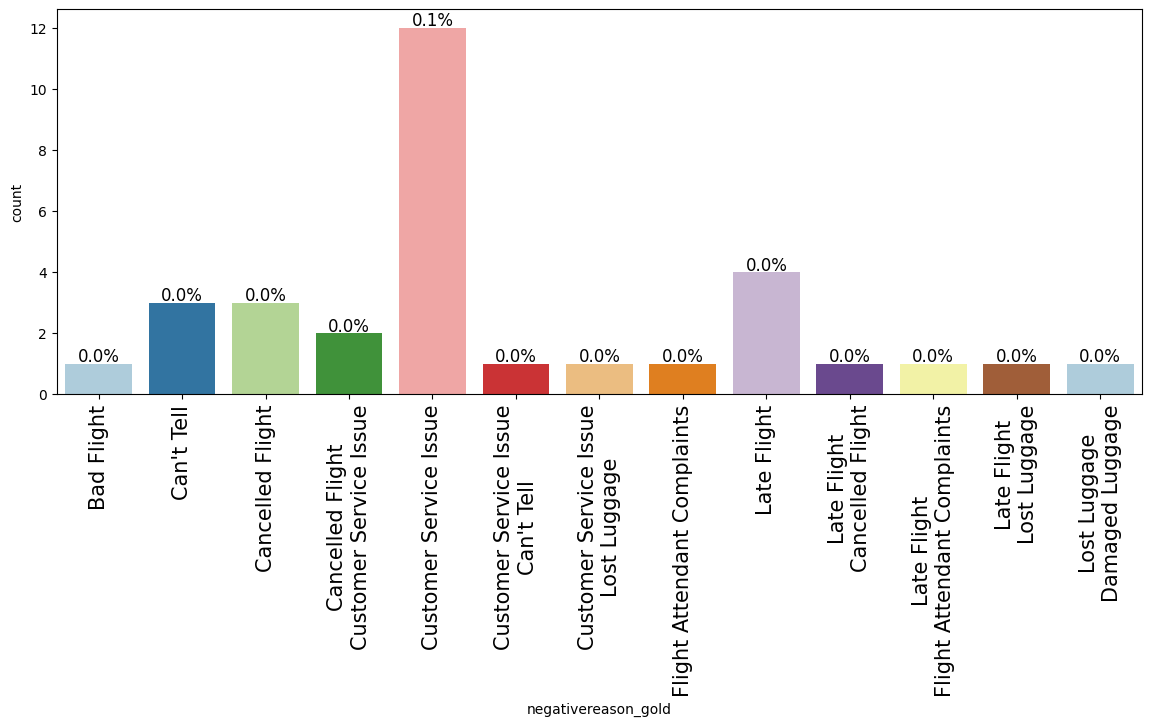

In [34]:
labeled_barplot(data, "negativereason_gold", perc=True)

#### 5. How does a wordcloud appear for negative tweets?

In [35]:
# Creating word cloud for negative reviews

negative_reviews = data[data['airline_sentiment'] == 'negative']

words = ' '.join(negative_reviews['text'])

cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])


In [36]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

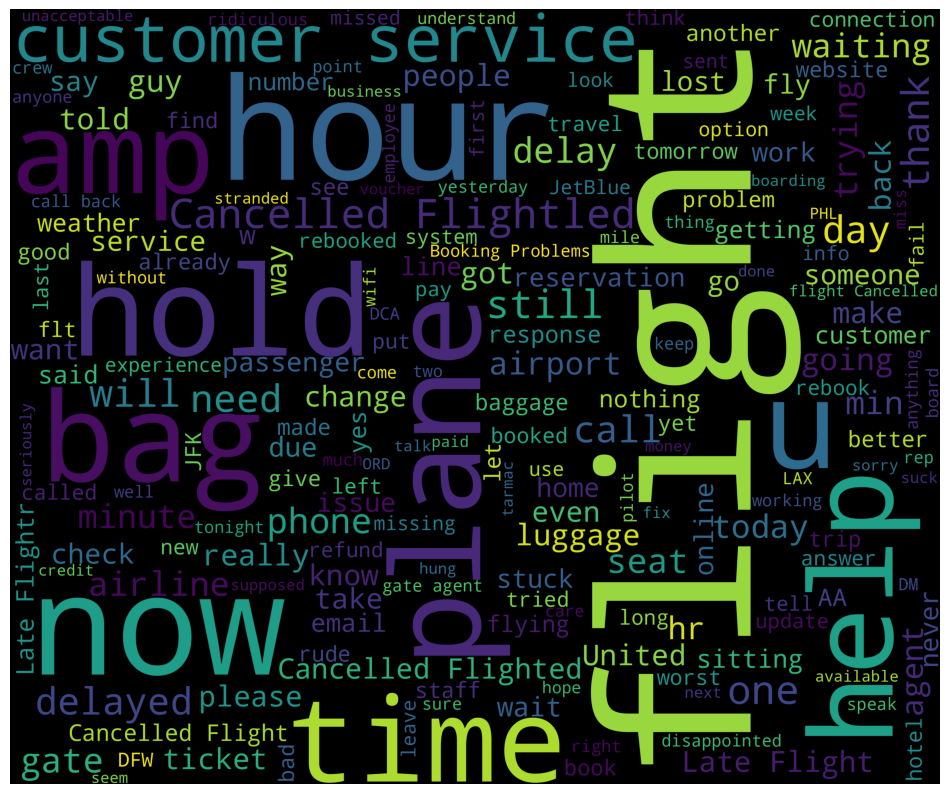

In [37]:
plt.figure(1, figsize = (12, 12))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

#### Observations:
* **flight, hold, hour, help, u, bag, plane, time, amp, Cancelled Flightled, day, still** were some of the important words observed in the positive tweets.

#### 6. How does a wordcloud appear for positive tweets?

In [38]:
# Creating word cloud for positive reviews

negative_reviews = data[data['airline_sentiment'] == 'positive']

words = ' '.join(negative_reviews['text'])

cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [39]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

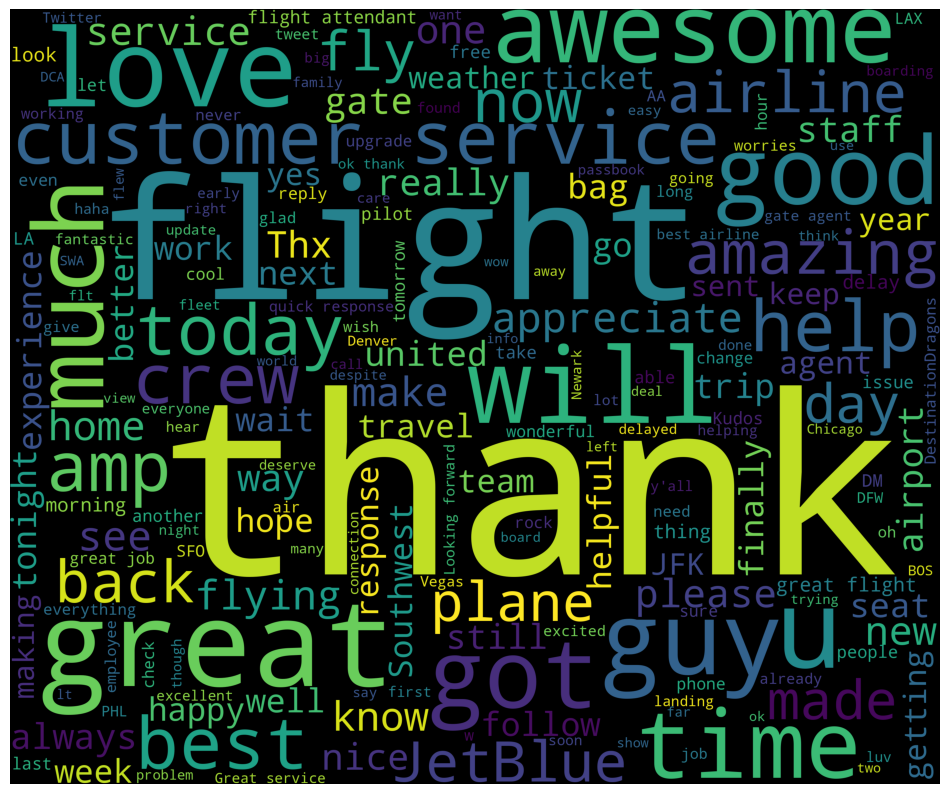

In [40]:
plt.figure(1, figsize = (12, 12))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

#### Observations:
* **thank, flight, great, guy, love, got, time, good, will, much, today, now, back, customer service, crew, help,amazing,  best, now, awesome, JetBlue** were some of the important words observed in the positive tweets.

#### 7. What are insights observed from EDA?

#### Observations:
* From the EDA, we can see that United had the max tweets and they were Mostly negative.
* Virgin got the least number of tweets.
* Southwest got the most positive  number of tweets.
* When we observe the negative tweets, the most number of tweets were for the reason was "Customer service issue".
* 62.7% of all the tweets in the dataset are negative.
* 21.2% of all the tweets in the dataset are neutral.
* 16.1% of all the tweets in the dataset are positive.


## Data Preparation for Modeling

- Drop all unnecessary columns
- Remove html tags
- Replace contractions in string(e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Tokenization
- To remove Stopwords
- Lemmatized data

### Drop all unnecessary columns

In [41]:
# Take text and airline sentiment columns from the data
df= data[['text', 'airline_sentiment']]

In [42]:
# Display the first 5 rows of the dataset
df.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [43]:
# Code to get the shape of the data
df.shape

(14604, 2)

In [44]:
# Code to display the unique values in airline sentiment column
df['airline_sentiment'].nunique()

3

In [45]:
 # Code to display the values in airline sentiment column
df['airline_sentiment'].value_counts()

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

### Remove HTML Tages

In [46]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

 # Code to apply strip html function on text column
df['text'] = df['text'].apply(lambda x: strip_html(x))
# Code to display the head of the data
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Replace contractions in string

In [47]:

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Code to apply replace_contractions function on text column
df['text'] = df['text'].apply(lambda x: replace_contractions(x))
# Code to display the head of the data
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Remove numbers

In [48]:

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# Code to apply remove_numbers function on text column
df['text'] = df['text'].apply(lambda x: remove_numbers(x))
# Code to display the head of the data
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Apply Tokenization

In [49]:
df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, have, added, com...
2        [@, VirginAmerica, I, did, not, today, ..., Mu...
3        [@, VirginAmerica, it, is, really, aggressive,...
4        [@, VirginAmerica, and, it, is, a, really, big...
                               ...                        
14599    [@, AmericanAir, thank, you, we, got, on, a, d...
14600    [@, AmericanAir, leaving, over, minutes, Late,...
14601    [@, AmericanAir, Please, bring, American, Airl...
14602    [@, AmericanAir, you, have, my, money, ,, you,...
14603    [@, AmericanAir, we, have, people, so, we, nee...
Length: 14604, dtype: object

In [50]:
# Code to apply tokenization on text column
df['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# Code to display the head of the data
df.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, 've, added, comm...",positive
2,"[@, VirginAmerica, I, did, n't, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, 's, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, 's, a, really, big...",negative


### Applying lowercase and removing stopwords and punctuation

**Adding Stopwords**

In [51]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

**All the preprocessing steps in one function**

In [52]:
lemmatizer = WordNetLemmatizer()


def remove_non_ascii(words):
    #Remove non-ASCII characters from list of tokenized words
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    #Convert all characters to lowercase from list of tokenized words
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    #Remove punctuation from list of tokenized words
    new_words = []
    for word in words:
        new_word = re.sub('[^a-zA-Z]', ' ', word)  #re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    #Remove stop words from list of tokenized words
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ''.join(words)

# Code to apply normalize function on text column
df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)
# Code to display the head of the data
df.head()


,text,airline_sentiment
0,virginamerica dhepburnsay,neutral
1,virginamericaplus veaddcommercialsexperience ...,positive
2,virginamerican ttoday mustmeanneedtakeanoth...,neutral
3,virginamerica sreallyaggressiveblastobnoxious...,negative
4,virginamerica sreallybigbadthing,negative


In [53]:
df.head(5)

,text,airline_sentiment
0,virginamerica dhepburnsay,neutral
1,virginamericaplus veaddcommercialsexperience ...,positive
2,virginamerican ttoday mustmeanneedtakeanoth...,neutral
3,virginamerica sreallyaggressiveblastobnoxious...,negative
4,virginamerica sreallybigbadthing,negative


## Model Building

### Using countvectorizer

- Intialize countvectorizer and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from Count vectorizer and random forest model


In [54]:
# Vectorization (Convert text data to numbers).

# Code to initialize the CountVectorizer function with max_ features = 5000.
Count_vec = CountVectorizer(max_features=5000)

# Code to fit and transrofm the count_vec variable on the text column
data_features = Count_vec.fit_transform(df['text'])

# Code to convert the datafram into array
data_features = data_features.toarray()

In [55]:
# Shape of the feature vector
data_features.shape

(14604, 5000)

#### Create train and test sets

In [56]:
df.head()

,text,airline_sentiment
0,virginamerica dhepburnsay,neutral
1,virginamericaplus veaddcommercialsexperience ...,positive
2,virginamerican ttoday mustmeanneedtakeanoth...,neutral
3,virginamerica sreallyaggressiveblastobnoxious...,negative
4,virginamerica sreallybigbadthing,negative


In [57]:
# Code to get the independent variable (data_features) stored as X

X = data_features
# Code to get the dependent variable (airline_sentiment) stored as Y
y = df.airline_sentiment

In [58]:
# Split data into training and testing set.

# Code to split the X and Y into train and test dat
X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=0.25, random_state=42)

In [59]:
y_test

169       neutral
2054     negative
10437    negative
9457     negative
14476    negative
           ...   
4122     negative
11049    negative
591      negative
12019     neutral
4881      neutral
Name: airline_sentiment, Length: 3651, dtype: object

#### Random Forest Model

In [60]:
# Using Random Forest to build model for the classification of reviews.

# Initialize the Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, n_jobs=4)

# Fit the forest variable on X_train and y_train
forest = forest.fit(X_train, y_train)

print(forest)

# Calculate cross validation score
print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_jobs=4)
0.6390040130141674


#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [61]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [62]:
# K-Fold Cross - validation .
# Initializing a emptry list to store the score
cv_scores = []
for b in base_ln:
     # Code to apply Rondome Forest Classifier
    clf = RandomForestClassifier(n_estimators = b)
    # Code to find the cross-validation score on the classifier (clf) for accuracy
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    # Append the scores to cv_scores list
    cv_scores.append(scores.mean())

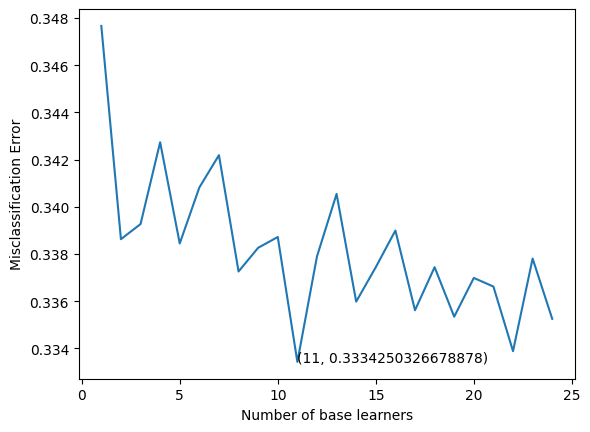

In [63]:
# plot the error as k increases
# Error corresponds to each number of estimator
error = [1 - x for x in cv_scores]
# Selection of optimal number of n_estimator corresponds to minimum error.
optimal_learners = base_ln[error.index(min(error))]
# Plot between each number of estimator and misclassification error
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [64]:
# Train the best model and calculating accuracy on test data .
# Initialize the Random Forest classifier with optimal learners
clf = RandomForestClassifier(n_estimators = optimal_learners)
# Fit the classifer on X_train and y_train
clf.fit(X_train, y_train)
# Find the score on X_test and y_test
clf.score(X_test, y_test)

0.678992056970693

In [65]:
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['positive', 'negative', 'neutral']))
print("Accuracy of the count vector model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    positive       0.71      0.92      0.80      2330
    negative       0.46      0.18      0.26       741
     neutral       0.58      0.33      0.42       580

    accuracy                           0.68      3651
   macro avg       0.58      0.48      0.49      3651
weighted avg       0.64      0.68      0.63      3651

Accuracy of the count vector model is :  0.678992056970693


#### Best Random Forest model

In [66]:
# Predict the result for test data using the model built above.
# Code to predict the X_test data using the model built above (forest)
result = clf.predict(X_test)

In [67]:
# Print and plot Confusion matirx
# Code to calculate the confusion matrix between test data and result
conf_mat = confusion_matrix(y_test, result)
# Print confusion matrix
print(conf_mat)

[[2153  106   71]
 [ 537  135   69]
 [ 335   54  191]]


<Axes: >

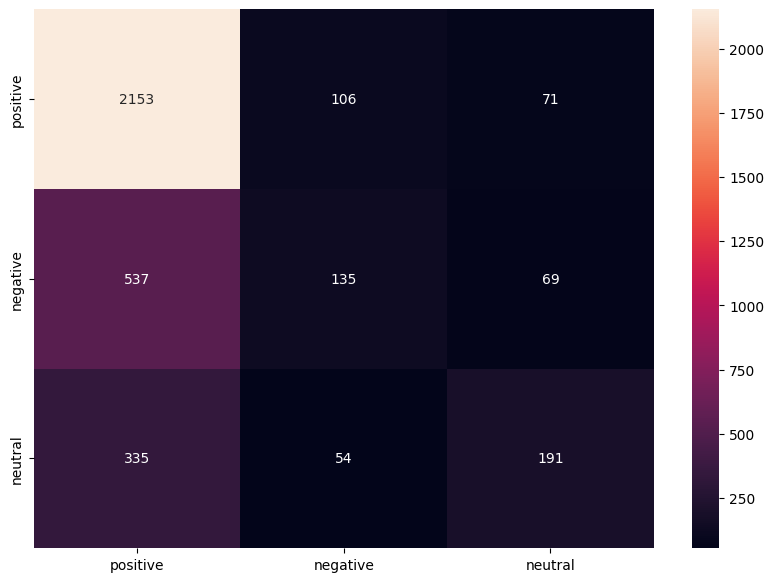

In [68]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Wordcloud of top 40 important features from countvectorizer+Randomforest based mode

In [69]:
# Instantiate the feature from the vectorizer
all_features = Count_vec.get_feature_names_out()

# Addition of top 40 feature into top_feature after training the model
top_features=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

thank,co,unitethank,americanairthank,jetbluethank,jetblue,usairwaysthank,usairways,http,amp,hours,southwestairthank,destinationdragons,unite,americanair,thankhelp,southwestair,virginamerica,fleet,lt,virginamericathank,sfleek,can,hrs,love,thankmuch,guyrock,minutes,thx,th,imaginedragons,kudos,jblu,help,fail,flight,today,avgeek,days,appreciate,
 
 


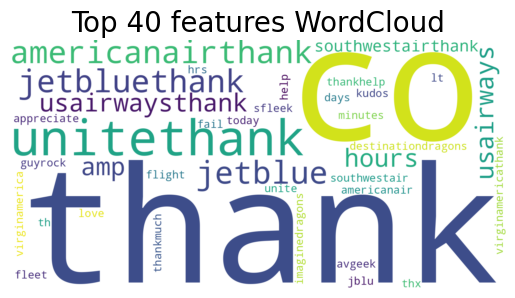

In [70]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#### Observations:
* **thank, CO, unitethank, jetbluethank, jetblue hours, americanairthank, amp** were some of the important words observed in the  tweets.


### Using TF-IDF (Term Frequency- Inverse Document Frequency)

- Intialize TFIDF and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from TFIDF and random forest model


#### Intialize TF-IDF and use it for vectorization

In [71]:
# Using TfidfVectorizer to convert text data to numbers.

# Code to initialize the TF-IDF vector function with max_features = 5000.
tfidf_vect = TfidfVectorizer(max_features=5000)

# Fit the tf idf function on the text column
data_features = tfidf_vect.fit_transform(df['text'])

# Code to convert the datafram into array
data_features = data_features.toarray()

In [72]:
# Code to check the shape of the data features
data_features.shape

(14604, 5000)

#### Store Independent and Dependent variables

In [73]:
# Code to get the independent variable (data_features) stored as X
X = data_features

# Code to get the dependent variable (airline_sentiment) stored as Y
y = df.airline_sentiment

In [74]:
# Split data into training and testing set.

# Code to split the X and Y into train and test dat
X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=0.25, random_state=42)

#### Random Forest Model

In [75]:
# Using Random Forest to build model for the classification of reviews.

# Initialize the Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, n_jobs=4)

# Fit the forest variable on X_train and y_train
forest = forest.fit(X_train, y_train)

print(forest)

# Calculate cross validation score
print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_jobs=4)
0.6468090911648054


#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [76]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [77]:
# K-Fold Cross - validation .
 # Initializing a emptry list to store the score
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    # Code to find the cross-validation score on the classifier (clf) for accuracy
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    # Append the scores to cv_scores list
    cv_scores.append(scores.mean())

#### Plot the misclassification error for each of estimators


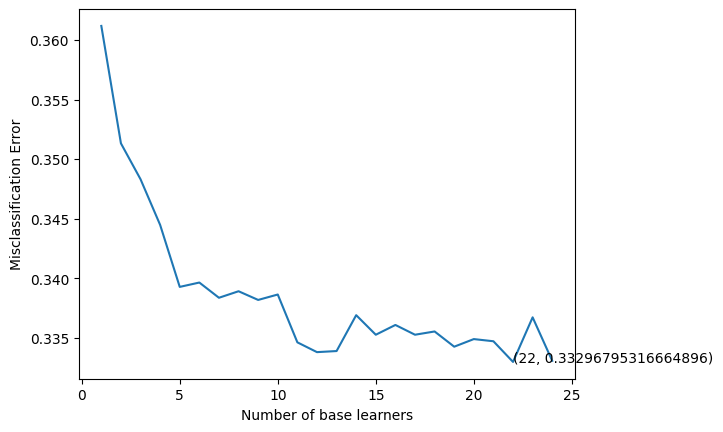

In [78]:
# plot the error as k increases
# Error corresponds to each number of estimator
error = [1 - x for x in cv_scores]
# Selection of optimal number of n_estimator corresponds to minimum error.
optimal_learners = base_ln[error.index(min(error))]
# Plot between each number of estimator and misclassification error
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [79]:
# Train the best model and calculating accuracy on test data .
 # Initialize the Random Forest classifier with optimal learners
clf = RandomForestClassifier(n_estimators = b)

# Fit the classifer on X_train and y_train
clf.fit(X_train, y_train)
# Find the score on X_test and y_test
clf.score(X_test, y_test)

0.686113393590797

In [80]:
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['positive', 'negative', 'neutral']))
print("Accuracy of the TF-IDF model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

    positive       0.71      0.94      0.81      2330
    negative       0.50      0.18      0.27       741
     neutral       0.61      0.31      0.41       580

    accuracy                           0.69      3651
   macro avg       0.61      0.48      0.50      3651
weighted avg       0.65      0.69      0.64      3651

Accuracy of the TF-IDF model is :  0.686113393590797


In [81]:
# Predict the result for test data using the model built above.
# Code to predict the X_test data using the model built above (forest)
result =clf.predict(X_test)

<Axes: >

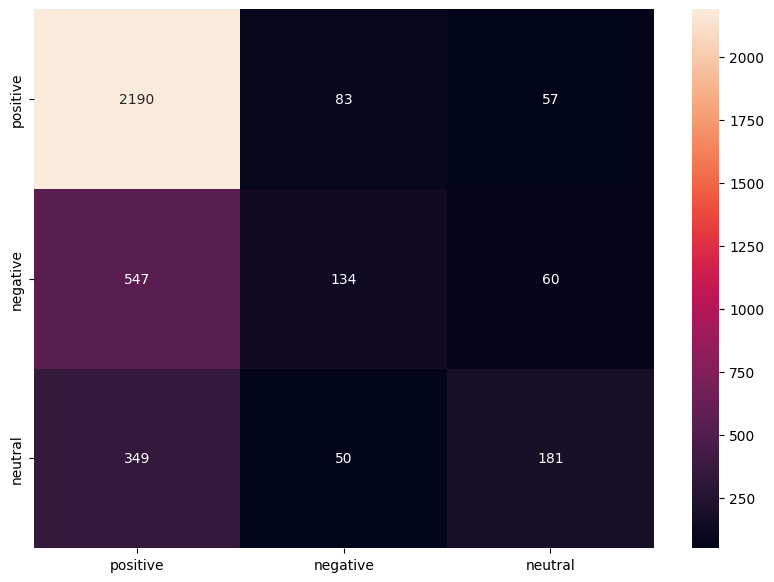

In [82]:
# Plot the confusion matrix
# Code to calculate the confusion matrix between test data and restust
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
# Code to plot the heatmap of the confusion matrix
sns.heatmap(df_cm, annot=True, fmt='g')

#### Wordcloud of top 20 important features from TF-IDF+Randomforest based mode

In [83]:
#Instantiate the feature from the vectorizer
all_features = tfidf_vect.get_feature_names_out()
top_features=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
# Addition of top 40 feature into top_feature after training the model
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

thank, co, unitethank, americanairthank, http, jetblue, amp, jetbluethank, unite, usairways, usairwaysthank, southwestair, americanair, southwestairthank, virginamerica, hours, destinationdragons, sfleek, fleet, can, virginamericathank, help, thx, love, hrs, th, thankhelp, imaginedragons, lt, thankmuch, appreciate, flight, fail, guyrock, lax, minutes, pm, rt, jblu, jetbluethankmuch, 
 
 


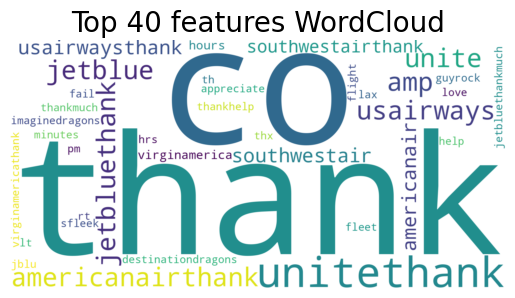

In [84]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#### Observations:
* **thank, CO, unitethank, jetblue, jetbluethank, americanairthank, amp, unite, usairways**  were some of the important words observed in the tweets.
* Most of the important words in this wordcloud is same as the Count Vector wordcloud as well.

### **Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF**

In [85]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
dfcomp= pd.DataFrame(y_test.tolist(),columns =['y_test'])
dfcomp['count_vectorizer_predicted'] = count_vectorizer_predicted
dfcomp['tf_idf_predicted'] = tf_idf_predicted
dfcomp.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,neutral,neutral,neutral
1,negative,negative,negative
2,negative,negative,negative
3,negative,negative,negative
4,negative,negative,negative


Althought the accuracy and other metrics for the Count Vectorizer and TF-IDF are almost same, TF-IDF shows a better performance than Count Vectorizer. This is because TF-IDF not only focuses on the frequency of words present in the corpus but also provides the importance of the words. Common words such as the, a, in etc. can be removed from the corpus, making the model building less complex by reducing the input dimensions.

### Using LSTM

- Tokenize the text column
- Encode the target variable
- Split the data into train and test
- Train the LSTM model
- Test the model on train and test data
- Plot the confusion matrix

In [86]:
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#### Tokenizing the text column

In [87]:
# Complete the code with by having 800 vocab size
tokenizer = Tokenizer(num_words = 800, split = ' ')

# Complete the code to fit tokenizer on text data
tokenizer.fit_on_texts(df['text'].values)

# Converting text to sequences
X = tokenizer.texts_to_sequences(df['text'].values)

# Padding the sequences
X = pad_sequences(X)

#### Encoding the target variable

In [88]:
# Storing the Label Binarizer
enc = LabelBinarizer()
# Fitting the Label Binarizer on airline_sentiment
y_encoded = enc.fit_transform(df['airline_sentiment'])

#### Split the data into train and test

In [89]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.30, random_state = 42)

#### Training LSTM Model

In [90]:
# Initializing the model
model = Sequential()

# Adding the embedding layer with 800 vocabularies, 120 neurons
model.add(Embedding(800, 120, input_length = X.shape[1]))

# Complete the code to add the LSTM layer with 256 neurons
model.add(LSTM(256,return_sequences=True))

# Complete the code to add the LSTM layer with 150 neurons and dropout_rate= 0.2
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

# Complete the code to add the dense layer with 124 neurons and relu activation function
model.add(Dense(124,activation = 'relu'))

# Complete the code to add dropout with dropout_rate= 0.2
model.add(Dropout(0.2))

# Complete the code to add a dense layer with 64 neurons and relu activation function
model.add(Dense(64, activation = 'relu'))

# Complete to the code to add the output layer with 3 neurons and softmax activation function
model.add(Dense(3, activation = 'softmax'))

# Complete the code to compile the model with categorical_crossentropy as loss function, accuracy as metrics and adam as optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [91]:
# Summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 120)           96000     
                                                                 
 lstm (LSTM)                 (None, 12, 256)           386048    
                                                                 
 lstm_1 (LSTM)               (None, 150)               244200    
                                                                 
 dense (Dense)               (None, 124)               18724     
                                                                 
 dropout (Dropout)           (None, 124)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8000      
                                                                 
 dense_2 (Dense)             (None, 3)                 1

In [92]:
%%time
# Complete the code to fit the model on X_train and y_train with epochs as 30, batch size as 32
his = model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose = 'auto')

Epoch 1/30
320/320 [==============================] - 42s 90ms/step - loss: 0.8812 - accuracy: 0.6312
Epoch 2/30
320/320 [==============================] - 23s 70ms/step - loss: 0.7996 - accuracy: 0.6632
Epoch 3/30
320/320 [==============================] - 24s 74ms/step - loss: 0.7790 - accuracy: 0.6760
Epoch 4/30
320/320 [==============================] - 23s 70ms/step - loss: 0.7629 - accuracy: 0.6830
Epoch 5/30
320/320 [==============================] - 22s 69ms/step - loss: 0.7506 - accuracy: 0.6888
Epoch 6/30
320/320 [==============================] - 24s 76ms/step - loss: 0.7396 - accuracy: 0.6922
Epoch 7/30
320/320 [==============================] - 22s 69ms/step - loss: 0.7269 - accuracy: 0.6974
Epoch 8/30
320/320 [==============================] - 23s 71ms/step - loss: 0.7192 - accuracy: 0.7012
Epoch 9/30
320/320 [==============================] - 23s 72ms/step - loss: 0.7113 - accuracy: 0.7027
Epoch 10/30
320/320 [==============================] - 22s 68ms/step - loss: 0.703

In [93]:
# Predicting on X_test using the above model
result = model.predict(X_test)

137/137 [==============================] - 1s 6ms/step


In [94]:
# Applying argmax function on the predicted values (result) to get the predicted labels
y_pred_arg=np.argmax(result,axis=1)
# Applying argmax function on the y_test to get back the predicted labels
y_test_arg=np.argmax(y_test,axis=1)

#### Plotting LSTM model accuracy and loss

In [95]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

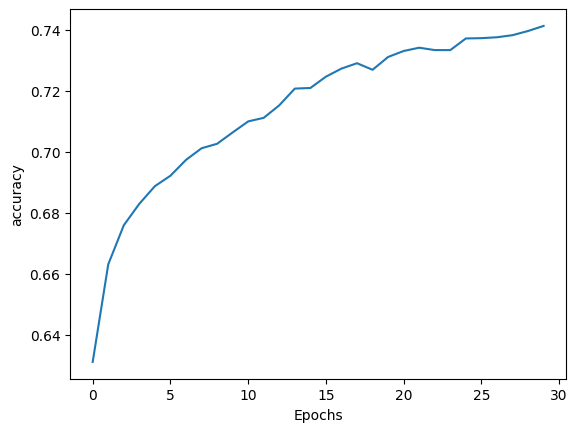

In [96]:
plot_graphs(his, 'accuracy')

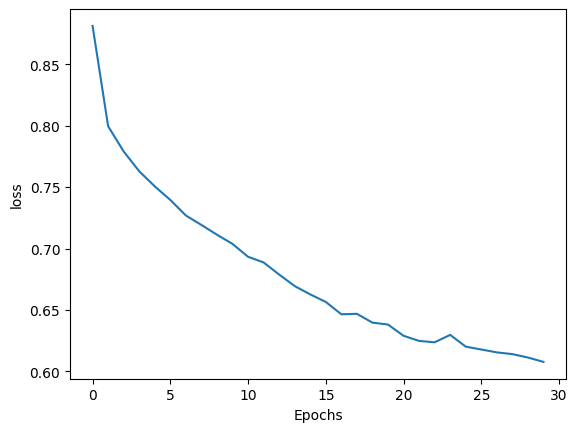

In [97]:
plot_graphs(his, 'loss')

#### Plotting the confusion matrix

<Axes: >

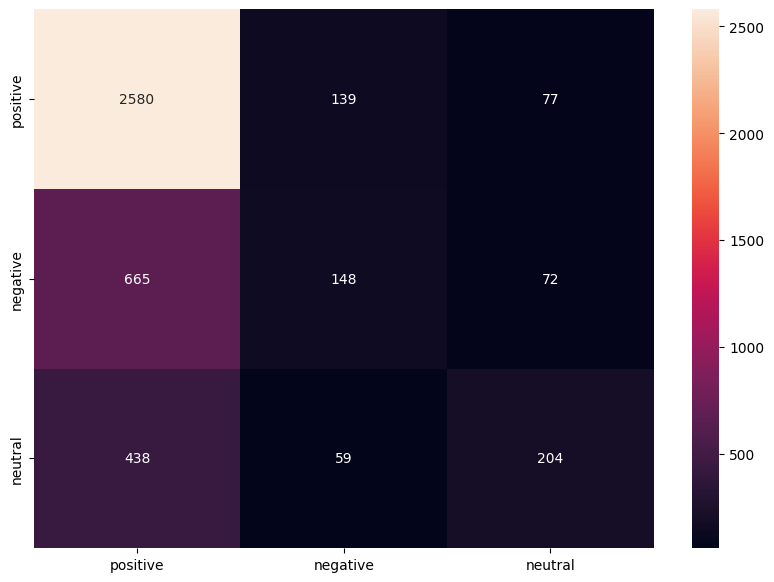

In [98]:
conf_mat = confusion_matrix(y_test_arg, y_pred_arg)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Model evaluation

In [99]:
model.evaluate(X_test,y_test)

137/137 [==============================] - 2s 9ms/step - loss: 1.2829 - accuracy: 0.6691


[1.282901644706726, 0.6691008806228638]

## Summary

---



* In this analysis, we have used the countvectorizer, TF-IDF and the LSTM methods to perform sentiment analysis.
* We can observe from the EDA plots that the negative tweets are more than the positive and neutral tweets.
* We could also observe the 40 most important words in the wordcloud as well as positive wordcloud and the negativewordclouds.
* We could also observe the reasons for the negative tweets. The companies can use this data to improve their services.
* The Countvectorizer and TF-IDF have very similar accuracies, about 69%, and other metrics. However, we can conclude that TF-IDF is a better technique to use as it not only considers frequency of words but also their importance in the corpus.
* The LSTM method is a very good method to use for sentiment analysis as it also captures sequential and contextual information and this will help in better prediction of messages.
* In the above analysis, the LSTM model accuracy on training data is about 73% and accuracy on test data is about 67% which is slightly less than the Countvectorization and the TF-IDF models in this analysis.
* We can however improve the accuracy of the LSTM model by using different data preprocessing, different optimazation method, making changes in the model layers, using regularization techniques, increasing the number or epoch and implementing earrly stopping etc.
* We could also use the Unsupervised NLP methods such as TextBlob and VADER methods to do the analysis.

## Business Recommendations

* We could also observe the reasons for the negative tweets. The companies can use this data to improve their services.
* The business can also observe the location and timezone to get valuable insights. For example, in the wordcloud, CO seems to be the most important word.
* The airlines and also see the customer sentiment about the competitors and improve upon their own services to improve their brand.
* The airlines can also see what is working for them and continue to offer and try to replicate it in other locations and timezones.
* The airlines can also try to collect other information like customer demographics, age groups, destinations they are going to, etc. and create deals and vacation packages etc.